# DESIGNTK 530 - I-9: Building Blocks I & Project Scoping
**Dataset:** REI hiking catalog webscraped from [https://www.rei.com/s/hiking-gear-clothes-boots](https://www.rei.com/s/hiking-gear-clothes-boots) 

**Objective:** Predict `Material` from `Brand` and `Price`; analyze how price affects material choices, and compare cheapest vs most expensive items.


## Problem 3.1 - Setup

**Dataset Link** [data/rei_hiking_clothes.csv]()

*Gathered using Webscraper.io sitemapping (custom)*
```
{"_id":"rei_hiking_clothes_paginated","startUrl":["https://www.rei.com/s/hiking-gear-clothes-boots?ir=collection%3Ahiking-gear-clothes-boots&r=category%3Awomens-clothing","https://www.rei.com/s/hiking-gear-clothes-boots?ir=collection%3Ahiking-gear-clothes-boots&r=category%3Amens-clothing"],"selectors":[{"id":"product_link","type":"SelectorLink","parentSelectors":["_root","pagination"],"selector":"#search-results > ul > li > a.O8aFd2MOq4cf8b3yUR2p.tS6GbfEJ9cTyCftpIpEO","multiple":true},{"id":"pagination","type":"SelectorLink","parentSelectors":["_root","pagination"],"selector":"#search-page-wrapper > div.uhCxDib4luSIS7EWFm8_ > div.U6aiNae0xHxm_mgWhHsW > nav > a:nth-child(8)","multiple":false},{"id":"item_name","type":"SelectorText","parentSelectors":["product_link"],"selector":"#product-page-title","multiple":false,"regex":""},{"id":"item_brand","type":"SelectorText","parentSelectors":["product_link"],"selector":"#product-brand-link","multiple":false,"regex":""},{"id":"item_price","type":"SelectorText","parentSelectors":["product_link"],"selector":"#buy-box-product-price","multiple":false,"regex":""},{"id":"item_description","type":"SelectorText","parentSelectors":["product_link"],"selector":"#product-primary-description > p","multiple":false,"regex":""},{"id":"item_id","type":"SelectorText","parentSelectors":["product_link"],"selector":"#product-page-breadcrumbsList > li:nth-child(6) > a","multiple":false,"regex":""},{"id":"item_materials","type":"SelectorText","parentSelectors":["product_link"],"selector":"#tech-specs-collapsible > table > tbody > tr:nth-child(2) > td > p","multiple":false,"regex":""}]}

```

In [2]:
pip install pandas numpy matplotlib seaborn tensorflow torch scikit-learn

44.79s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 13.4 MB/s  0:00:00m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 24.1 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.4/200.4 MB 51.4 MB/s  0:00:03m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 55.8 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.6/663.6 kB 25.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 MB 57.2 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 52.9 MB/s  0:00:00m0:00:01
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Cleaning
- remove un-needed columns
- verify NA cells

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rei_catalog_data = pd.read_csv("data/rei_hiking_clothes.csv",encoding='utf-8')
rei_catalog_data.head()

,web_scraper_order,web_scraper_start_url,product_link,product_link-href,pagination,pagination-href,item_name,item_brand,item_price,item_description,item_id,item_materials
0,1762303463-1,https://www.rei.com/s/hiking-gear-clothes-boot...,Darn ToughBear Town Micro Crew Socks - Women's,https://www.rei.com/product/159260/darn-tough-...,NaN,NaN,Darn Tough Bear Town Micro Crew Socks - Women's,Darn Tough,$25.00,Lightly cushioned hiking socks with all the an...,#159260,54% nylon/43% merino wool/3% Lycra spandex
1,1762303466-2,https://www.rei.com/s/hiking-gear-clothes-boot...,Royal RobbinsWestlands Relaxed Pullover - Women's,https://www.rei.com/product/255834/royal-robbi...,NaN,NaN,Royal Robbins Westlands Relaxed Pullover - W...,Royal Robbins,$82.73,Spend the cooler months in this cozy Royal Rob...,#255834,60% merino wool/40% recycled polyester
2,1762303470-3,https://www.rei.com/s/hiking-gear-clothes-boot...,The North FaceL/S Lightrange Shirt - Women's,https://www.rei.com/product/243580/the-north-f...,NaN,NaN,The North Face L/S Lightrange Shirt - Women's,The North Face,$46.83,"Designed for hiking, the women's The North Fac...",#243580,Main body: 100 g/m2 82% recycled polyester/18%...
3,1762303474-4,https://www.rei.com/s/hiking-gear-clothes-boot...,WoolrichMerino Wool Hiking Crew Socks - Men's,https://www.rei.com/product/229499/woolrich-me...,NaN,NaN,Woolrich Merino Wool Hiking Crew Socks - Men's,Woolrich,$17.73,"Ideal for year-round hiking, these Woolrich me...",#229499,79% merino wool/20% nylon/1% LYCRA spandex
4,1762303477-5,https://www.rei.com/s/hiking-gear-clothes-boot...,REI Co-opSahara Stretch Convertible Pants - Wo...,https://www.rei.com/product/242644/rei-co-op-s...,NaN,NaN,REI Co-op Sahara Stretch Convertible Pants -...,REI Co-op,$49.83,Inspired by our iconic hiking pants—but design...,#242644,88% nylon/12% spandex (bluesign approved)


In [49]:
# Drop unwanted columns
rei_catalog_data = rei_catalog_data.drop(columns=[
    'web_scraper_order',
    'web_scraper_start_url',
    'pagination',
    'pagination-href',
    'product_link',
    'product_link-href'
], errors='ignore')

rei_catalog_data['item_price'] = rei_catalog_data['item_price'].replace('[\$,]', '', regex=True).astype(float)
rei_catalog_data['item_materials'] = rei_catalog_data['item_materials'].str.lower()


#print(rei_catalog_data.select_dtypes(include='object').isna().sum())

### Summary Statistics

In [50]:
# --- 
# Brand frequency summary 
# ---
brand_summary = (
    rei_catalog_data['item_brand']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Brand', 'item_brand': 'Count'})
)

print("=== Price Summary ===")
print(rei_catalog_data['item_price'].describe())

print("=== Most Common Brands ===")
print(brand_summary.head(10))
print("=== Brands Stats ===")
print(rei_catalog_data['item_brand'].describe())

=== Price Summary ===
count    229.000000
mean      78.781790
std       77.648212
min        5.950000
25%       25.000000
50%       49.950000
75%       99.950000
max      500.000000
Name: item_price, dtype: float64
=== Most Common Brands ===
            Count  count
0       REI Co-op     64
1        Columbia     20
2       Smartwool     16
3      Darn Tough     15
4  The North Face      9
5       Arc'teryx      8
6            KUHL      7
7      Icebreaker      6
8     La Sportiva      5
9        Cotopaxi      5
=== Brands Stats ===
count           229
unique           51
top       REI Co-op
freq             64
Name: item_brand, dtype: object


In [52]:
rei_catalog_data.head(1)
rei_catalog_data.to_csv('data/cleaned_rei_data.csv', index=False)

## Problem 3.2 - Decision Tree / Random Forest

*What would you hope to understand about the data from applying this method? How would the result assist in creating the experience you identified in Part I?*
> I hope to see a correlation between brand, price and material. If successful, this would allow for a prediction method that provides quick advice regarding products and the best quality for money (subjective).

### Numerical Encoding of Dataset

In [27]:
# Brand Encoding
brand_dummies = pd.get_dummies(rei_catalog_data['item_brand'])

# Material Encoding
materials = [
    "abs plastic",
    "aluminum",
    "alpaca wool",
    "cotton",
    "coolmax polyester",
    "deet",
    "elastane",
    "eva foam",
    "gore-tex",
    "jacquard",
    "kevlar",
    "leather",
    "lycra",
    "mesh",
    "microfiber",
    "nylon",
    "organic cotton",
    "paper",
    "peva",
    "polyamide",
    "polyester",
    "polyethylene",
    "polypropylene",
    "polyurethane",
    "rayon",
    "rebotl",
    "recycled nylon",
    "recycled polyester",
    "ripstop nylon",
    "rubber",
    "spandex",
    "suede",
    "tencel",
    "tpu",
    "wool"
]
for m in materials:
    rei_catalog_data[m] = rei_catalog_data['item_materials'].str.contains(m, case=False, na=False).astype(int)
# Combine
rei_catalog_encoded = pd.concat([rei_catalog_data[['item_price']], brand_dummies, rei_catalog_data[materials]], axis=1)
rei_catalog_encoded.dropna()

,item_price,Aku,Altra,Arc'teryx,Arms of Andes,Asolo,Ben's,Black Diamond,Buff,Carolina Mfg.,...,rebotl,recycled nylon,recycled polyester,ripstop nylon,rubber,spandex,suede,tencel,tpu,wool
0,25.00,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,1
1,82.73,False,False,False,False,False,False,False,False,False,...,0,0,1,0,0,0,0,0,0,1
2,46.83,False,False,False,False,False,False,False,False,False,...,0,0,1,0,0,0,0,0,0,0
3,17.73,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,1
4,49.83,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,14.73,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,1
226,89.95,False,False,False,False,False,False,False,False,False,...,0,0,1,0,0,0,0,0,0,0
227,31.49,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
228,59.95,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0


In [28]:
rei_catalog_encoded.head(10)

,item_price,Aku,Altra,Arc'teryx,Arms of Andes,Asolo,Ben's,Black Diamond,Buff,Carolina Mfg.,...,rebotl,recycled nylon,recycled polyester,ripstop nylon,rubber,spandex,suede,tencel,tpu,wool
0,25.00,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,1
1,82.73,False,False,False,False,False,False,False,False,False,...,0,0,1,0,0,0,0,0,0,1
2,46.83,False,False,False,False,False,False,False,False,False,...,0,0,1,0,0,0,0,0,0,0
3,17.73,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,1
4,49.83,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
5,16.95,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,1
6,17.73,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,1
7,34.95,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
8,49.95,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
9,26.00,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,1


### Correlation Matrix

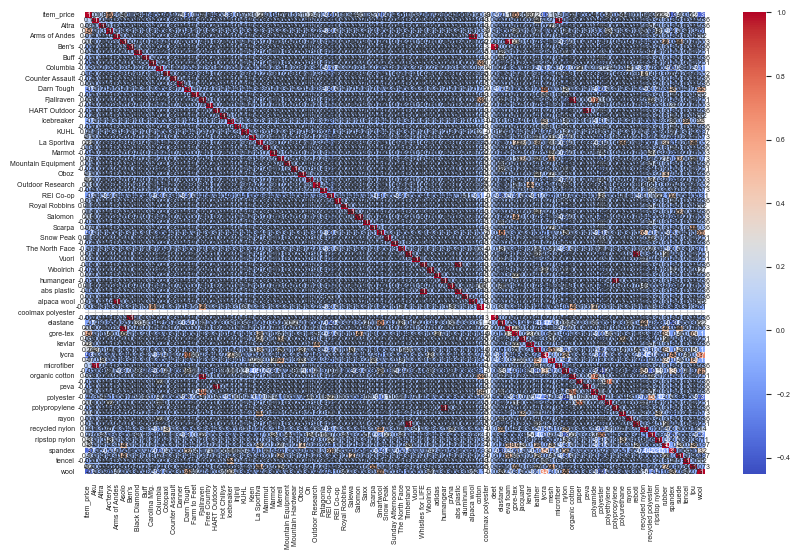

In [29]:
plt.rc('font', size=5)
#correration matrix
corr_matrix = rei_catalog_encoded.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Problem 3.3 - Apply Selection

### Setup

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = (8,5)
sns.set_style('whitegrid')

### Decision Tree - Material Prediction

In [31]:
material_Y = rei_catalog_data[materials]
material_X = rei_catalog_encoded.drop(columns=['item_price'] + materials)

material_X_train, matierial_X_test, material_Y_train, material_Y_test = train_test_split(material_X, material_Y, test_size=0.1, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(material_X_train, material_Y_train)

y_pred = clf.predict(matierial_X_test)
print(f"Accuracy for predicting materials: {accuracy_score(material_Y_test, y_pred):.2%}")

Accuracy for predicting materials: 26.09%


### Decision Tree - Price Prediction

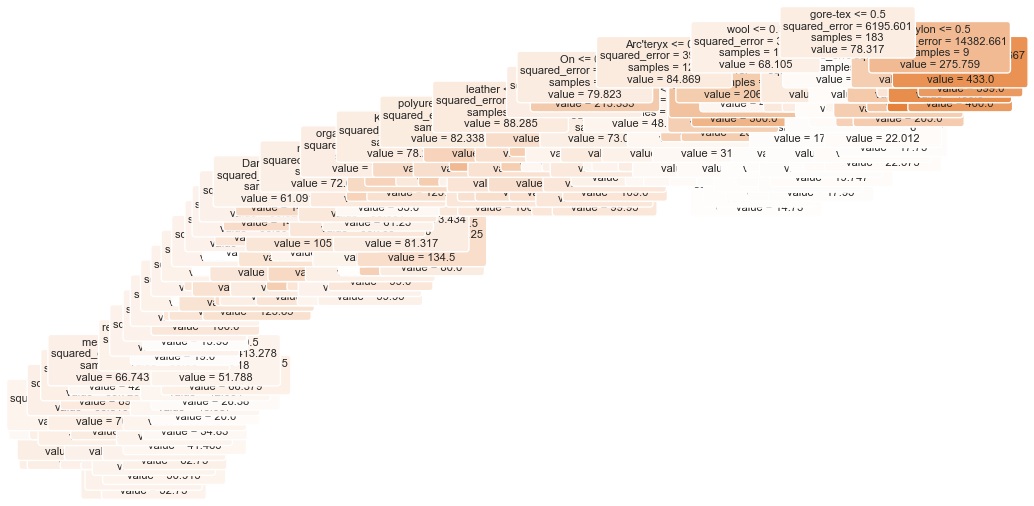

In [33]:
rei_catalog_clean = rei_catalog_encoded.dropna(subset=['item_price'])

price_X = rei_catalog_clean.drop(columns=['item_price'])
price_Y = rei_catalog_clean['item_price']

price_X_train, price_X_test, price_Y_train, price_Y_test = train_test_split(price_X, price_Y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(random_state=42)
tree.fit(price_X_train, price_Y_train)

plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=price_X.columns, filled=True, fontsize=8, rounded=True)
plt.show()

In [35]:
from sklearn.tree import export_text

tree_rules = export_text(tree, feature_names=list(price_X.columns), max_depth=3)
print(tree_rules)

|--- gore-tex <= 0.50
|   |--- wool <= 0.50
|   |   |--- Arc'teryx <= 0.50
|   |   |   |--- On <= 0.50
|   |   |   |   |--- truncated branch of depth 27
|   |   |   |--- On >  0.50
|   |   |   |   |--- value: [213.33]
|   |   |--- Arc'teryx >  0.50
|   |   |   |--- polyester <= 0.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- polyester >  0.50
|   |   |   |   |--- value: [44.83]
|   |--- wool >  0.50
|   |   |--- nylon <= 0.50
|   |   |   |--- recycled polyester <= 0.50
|   |   |   |   |--- value: [95.00]
|   |   |   |--- recycled polyester >  0.50
|   |   |   |   |--- value: [82.73]
|   |   |--- nylon >  0.50
|   |   |   |--- Hot Chillys <= 0.50
|   |   |   |   |--- truncated branch of depth 8
|   |   |   |--- Hot Chillys >  0.50
|   |   |   |   |--- value: [44.73]
|--- gore-tex >  0.50
|   |--- nylon <= 0.50
|   |   |--- adidas <= 0.50
|   |   |   |--- leather <= 0.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- leather >  0.50
|   |   |   |

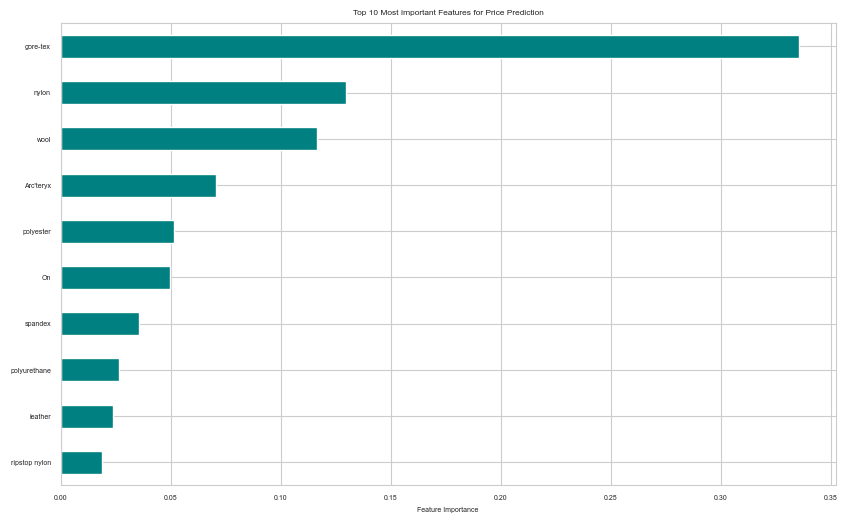

In [36]:

importances = pd.Series(tree.feature_importances_, index=price_X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Most Important Features for Price Prediction")
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.show()


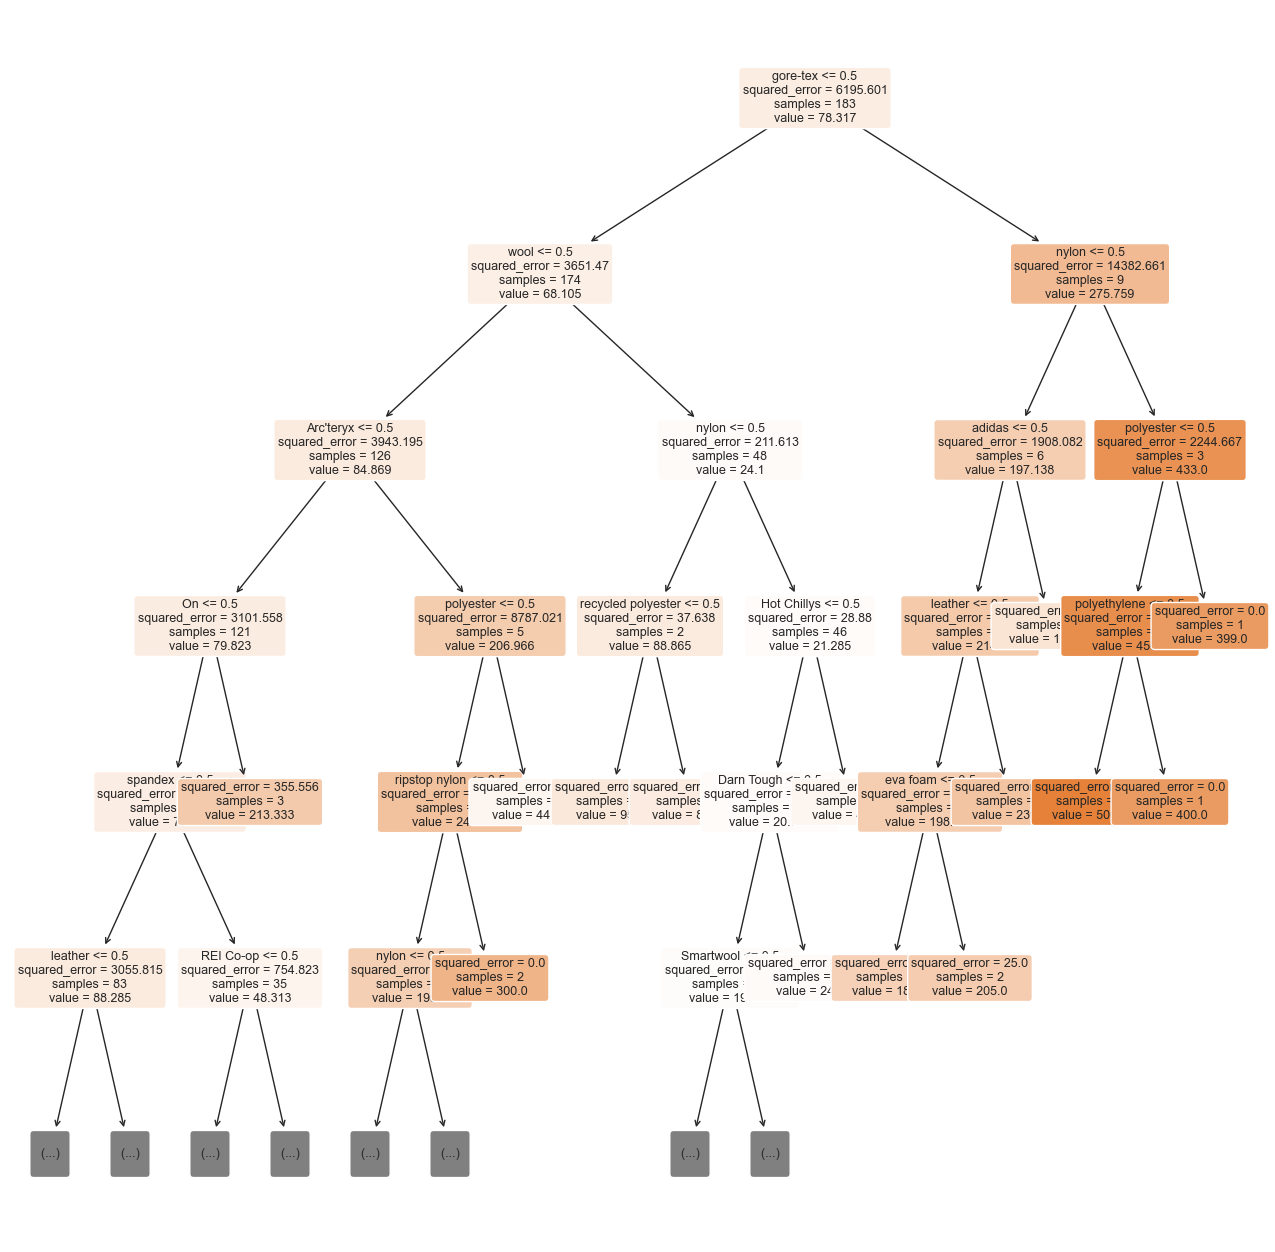

In [38]:
plt.figure(figsize=(16, 16))
plot_tree(
    tree,
    feature_names=price_X.columns,
    filled=True,
    fontsize=9,
    rounded=True,
    max_depth=5
)
plt.show()

## Problem 3.4 - Stretch